In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from warnings import filterwarnings
filterwarnings("ignore")

# Problem 1

In [2]:
df = pd.read_csv('bank_marketing_part1_Data.csv')

#### Q1.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

In [3]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [4]:
df.shape

(210, 7)

In [5]:
df.dtypes

spending                        float64
advance_payments                float64
probability_of_full_payment     float64
current_balance                 float64
credit_limit                    float64
min_payment_amt                 float64
max_spent_in_single_shopping    float64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


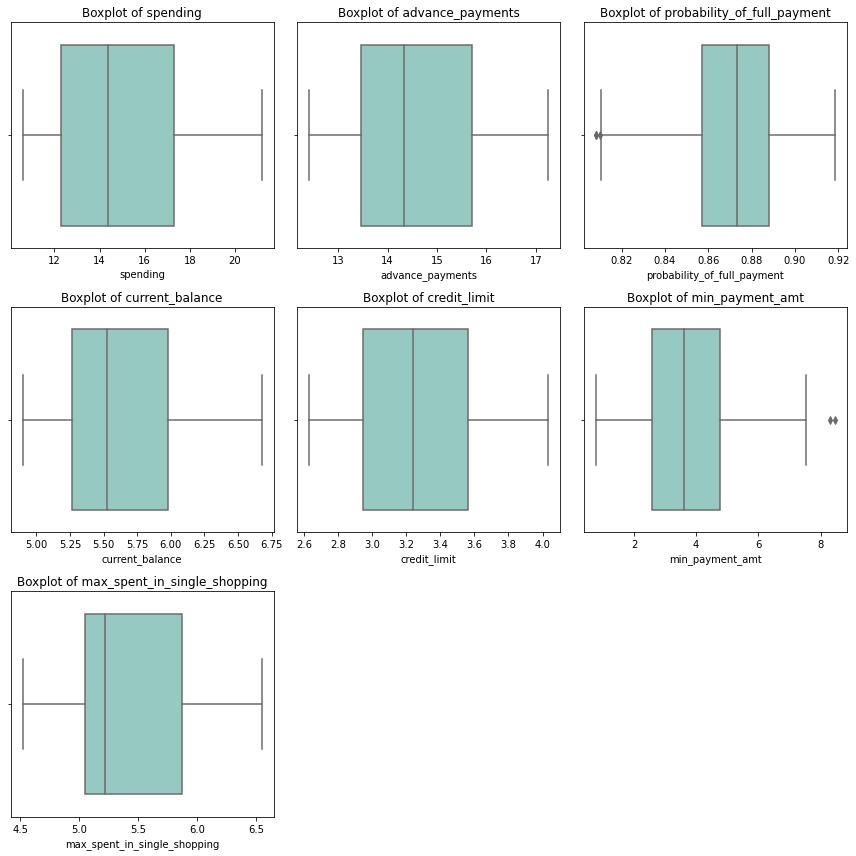

In [7]:
plt.figure(figsize = (12,12))
for i in range(len(df.columns)):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x = df[df.columns[i]], data = df, palette='Set3')
    plt.title('Boxplot of {}'.format(df.columns[i]))
    plt.tight_layout()

In [8]:
len(df.columns)

7

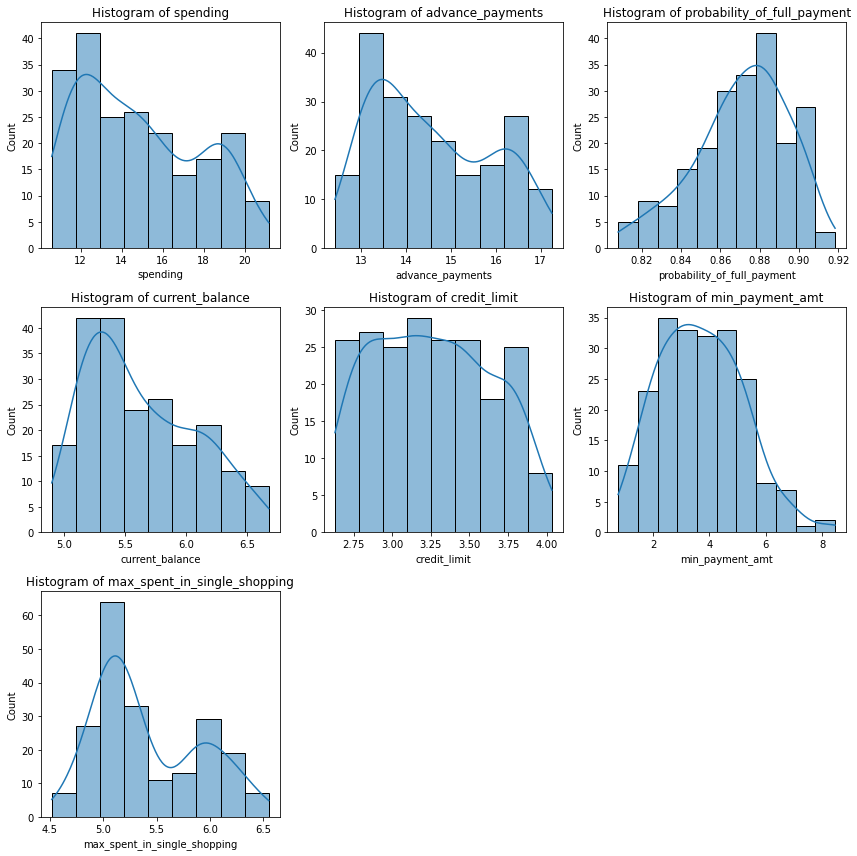

In [9]:
plt.figure(figsize = (12,12))
for i in range(len(df.columns)):
    plt.subplot(3, 3, i + 1)
    sns.histplot(x = df[df.columns[i]], data = df, kde=True)
    plt.title('Histogram of {}'.format(df.columns[i]))
    plt.tight_layout()

In [10]:
df.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


<Figure size 504x504 with 0 Axes>

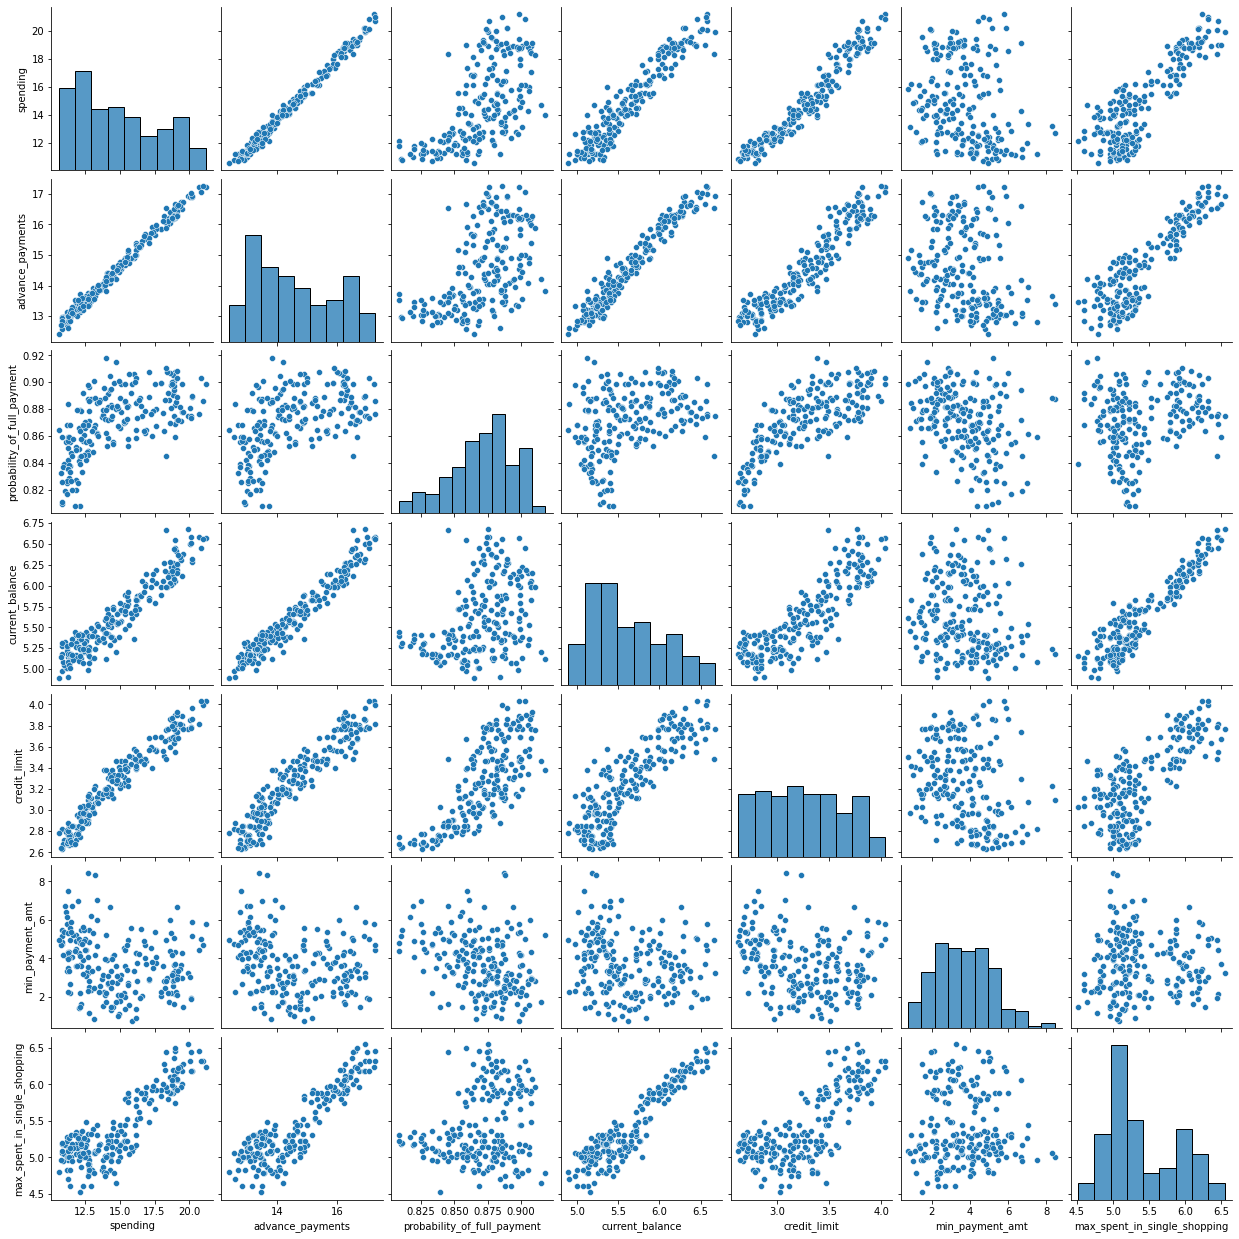

In [11]:
plt.figure(figsize=(7, 7))
sns.pairplot(data=df)

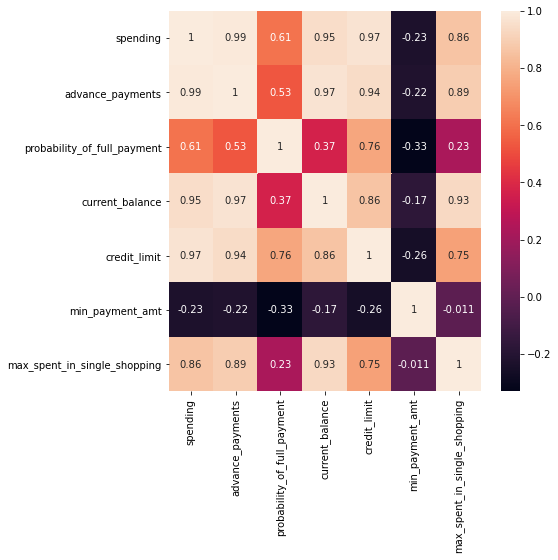

In [12]:
cor = df.corr()
plt.figure(figsize=(7, 7))
sns.heatmap(cor,annot = True);

#### Q1.2 Do you think scaling is necessary for clustering in this case? Justify

In [13]:
std_dev_df = df.std().to_frame().reset_index()
std_dev_df.columns = ['columns', 'Standard Deviation']
std_dev_df

,columns,Standard Deviation
0,spending,2.909699
1,advance_payments,1.305959
2,probability_of_full_payment,0.023629
3,current_balance,0.443063
4,credit_limit,0.377714
5,min_payment_amt,1.503557
6,max_spent_in_single_shopping,0.491480


In [14]:
var_df = df.var().to_frame().reset_index()
var_df.columns = ['columns', 'Variance']
var_df

,columns,Variance
0,spending,8.466351
1,advance_payments,1.705528
2,probability_of_full_payment,0.000558
3,current_balance,0.196305
4,credit_limit,0.142668
5,min_payment_amt,2.260684
6,max_spent_in_single_shopping,0.241553


In [15]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler()
scaled_df = x.fit_transform(df)
scaled_df

array([[ 1.75435461,  1.81196782,  0.17822987, ...,  1.33857863,
        -0.29880602,  2.3289982 ],
       [ 0.39358228,  0.25383997,  1.501773  , ...,  0.85823561,
        -0.24280501, -0.53858174],
       [ 1.41330028,  1.42819249,  0.50487353, ...,  1.317348  ,
        -0.22147129,  1.50910692],
       ...,
       [-0.2816364 , -0.30647202,  0.36488339, ..., -0.15287318,
        -1.3221578 , -0.83023461],
       [ 0.43836719,  0.33827054,  1.23027698, ...,  0.60081421,
        -0.95348449,  0.07123789],
       [ 0.24889256,  0.45340314, -0.77624835, ..., -0.07325831,
        -0.70681338,  0.96047321]])

In [16]:
scaled_df = pd.DataFrame(scaled_df, index=df.index, columns=df.columns)
scaled_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813


In [17]:
scaled_df.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02
mean,9.148766e-16,1.097006e-16,1.243978e-15,-1.089076e-16,-2.994298e-16,5.302637e-16,-1.935489e-15
std,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00
min,-1.466714e+00,-1.649686e+00,-2.668236e+00,-1.650501e+00,-1.668209e+00,-1.956769e+00,-1.813288e+00
25%,-8.879552e-01,-8.514330e-01,-5.980791e-01,-8.286816e-01,-8.349072e-01,-7.591477e-01,-7.404953e-01
50%,-1.696741e-01,-1.836639e-01,1.039927e-01,-2.376280e-01,-5.733534e-02,-6.746852e-02,-3.774588e-01
75%,8.465989e-01,8.870693e-01,7.116771e-01,7.945947e-01,8.044956e-01,7.123789e-01,9.563941e-01
max,2.181534e+00,2.065260e+00,2.006586e+00,2.367533e+00,2.055112e+00,3.170590e+00,2.328998e+00


#### Q 1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them.

In [18]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [19]:
wardlink = linkage(scaled_df, method = 'ward')

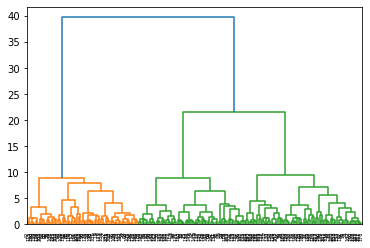

In [20]:
dend = dendrogram(wardlink)

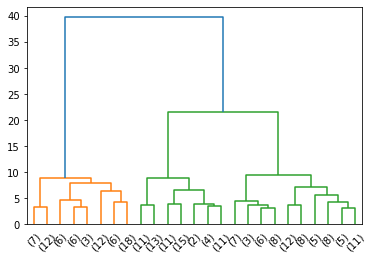

In [21]:
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 25,# we are looking at the last 25 merges
                 )

In [22]:
from scipy.cluster.hierarchy import fcluster

In [23]:
clusters_1 = fcluster(wardlink, 2, criterion='maxclust')
clusters_1

array([1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1,
       2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1,
       1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1,
       2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2], dtype=int32)

In [24]:
df['H_clusters'] = clusters_1

In [25]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,H_clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


In [26]:
df.H_clusters.value_counts().sort_index()

1     70
2    140
Name: H_clusters, dtype: int64

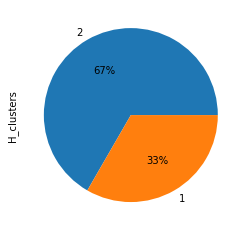

In [27]:
pd.value_counts(df["H_clusters"]).plot(kind="pie",autopct='%1.0f%%')
plt.show()

In [28]:
aggdata=df.groupby('H_clusters').mean()
aggdata['Freq']=df.H_clusters.value_counts().sort_index()
aggdata

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
H_clusters,,,,,,,,
1,18.371429,16.145429,0.884400,6.158171,3.684629,3.639157,6.017371,70
2,13.085571,13.766214,0.864298,5.363714,3.045593,3.730723,5.103421,140


#### Q 1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score. Explain the results properly. Interpret and write inferences on the finalized clusters.

In [29]:
from sklearn.cluster import KMeans 

In [30]:
wss = []
k_value = []
for i in range(1,11):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(scaled_df)
    k_value.append(i)
    wss.append(KM.inertia_)

In [31]:
wss_df = pd.DataFrame.from_dict({ 'k_values':k_value, 'wss':wss})
wss_df

,k_values,wss
0,1,1470.000000
1,2,659.171754
2,3,430.658973
3,4,371.385091
4,5,327.212782
5,6,289.315995
6,7,262.981866
7,8,241.818947
8,9,223.912542
9,10,206.396122


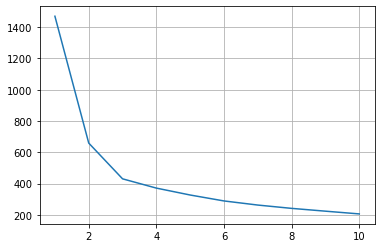

In [32]:
plt.plot(wss_df['k_values'], wss_df['wss'])
plt.grid()
plt.show()

In [33]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(scaled_df)
labels = k_means.labels_
labels

array([2, 0, 2, 1, 2, 1, 1, 0, 2, 1, 2, 0, 1, 2, 0, 1, 0, 1, 1, 1, 1, 1,
       2, 1, 0, 2, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2,
       1, 1, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 0, 1, 1, 0, 0, 2,
       2, 0, 2, 1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 0, 0, 0, 0, 2, 1, 0, 2, 0,
       2, 1, 0, 2, 0, 1, 1, 2, 2, 2, 1, 2, 0, 2, 0, 2, 0, 2, 2, 1, 1, 2,
       0, 0, 2, 1, 1, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 2, 1, 0, 0, 1, 0,
       0, 2, 1, 2, 2, 1, 2, 0, 0, 0, 1, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 2, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 0, 1, 0, 2, 2, 2,
       0, 1, 0, 1, 0, 0, 0, 0, 2, 2, 1, 0, 0, 1, 1, 0, 1, 2, 0, 2, 2, 1,
       2, 1, 0, 2, 0, 1, 2, 0, 2, 0, 0, 0])

In [34]:
DF_Kmeans = df.drop('H_clusters',axis=1)
DF_Kmeans['K_clusters'] = labels

In [35]:
DF_Kmeans.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,K_clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,2
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,0
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,2
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,1
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,2


In [36]:
DF_Kmeans.K_clusters.value_counts().sort_index()

0    71
1    72
2    67
Name: K_clusters, dtype: int64

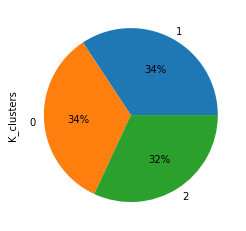

In [37]:
pd.value_counts(DF_Kmeans["K_clusters"]).plot(kind="pie",autopct='%1.0f%%')
plt.show()

In [38]:
aggdata=DF_Kmeans.groupby('K_clusters').mean()
aggdata['Freq']=DF_Kmeans.K_clusters.value_counts().sort_index()
aggdata

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
K_clusters,,,,,,,,
0,14.437887,14.337746,0.881597,5.514577,3.259225,2.707341,5.120803,71
1,11.856944,13.247778,0.848253,5.231750,2.849542,4.742389,5.101722,72
2,18.495373,16.203433,0.884210,6.175687,3.697537,3.632373,6.041701,67


In [39]:
k_means = KMeans(n_clusters = 2,random_state=1)
k_means.fit(scaled_df)
labels2 = k_means.labels_
labels2

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1])

In [40]:
from sklearn.metrics import silhouette_samples, silhouette_score

For K=3

In [41]:
silhouette_score(scaled_df,labels)

0.40072705527512986

In [42]:
arr = silhouette_samples(scaled_df,labels)
len(arr[arr<0])

0

For k=2

In [43]:
silhouette_score(scaled_df,labels2)

0.46577247686580914

In [44]:
arr = silhouette_samples(scaled_df,labels2)
len(arr[arr<0])

1

For k = 4

In [45]:
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(scaled_df)
labels4 = k_means.labels_
silhouette_score(scaled_df,labels4)

0.3276547677266192

In [46]:
arr = silhouette_samples(scaled_df,labels4)
len(arr[arr<0])

3

# Problem - 2

In [47]:
df2 = pd.read_csv('insurance_part2_data.csv')

#### Q 2.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

In [48]:
df2.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [49]:
df2.dtypes

Age               int64
Agency_Code      object
Type             object
Claimed          object
Commision       float64
Channel          object
Duration          int64
Sales           float64
Product Name     object
Destination      object
dtype: object

In [50]:
df2.shape

(3000, 10)

In [51]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [52]:
numeric_columns = []
object_columns = []
for col in df2.columns:
    if df2[col].dtype != 'object':
        numeric_columns.append(col)
    else:
        object_columns.append(col)
        
numeric_columns

['Age', 'Commision', 'Duration', 'Sales']

In [53]:
object_columns

['Agency_Code', 'Type', 'Claimed', 'Channel', 'Product Name', 'Destination']

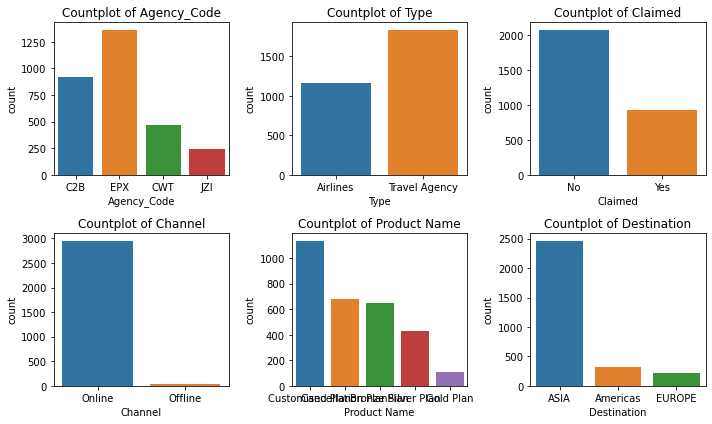

In [54]:
plt.figure(figsize = (10,6))
for i in range(len(object_columns)):
    plt.subplot(2, 3, i + 1)
    sns.countplot(x = df2[object_columns[i]], data = df2)
    plt.title('Countplot of {}'.format(object_columns[i]))
    plt.tight_layout()
    

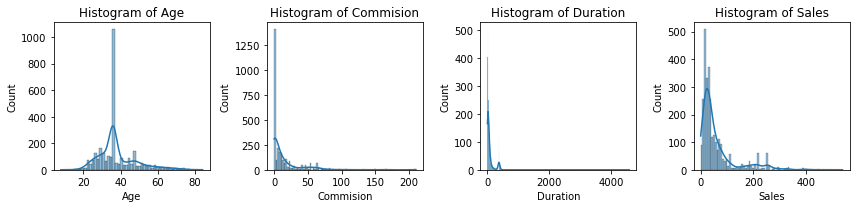

In [55]:
plt.figure(figsize = (12,3))
for i in range(len(numeric_columns)):
    plt.subplot(1, 4, i + 1)
    sns.histplot(x = df2[numeric_columns[i]], data = df2, kde=True)
    plt.title('Histogram of {}'.format(numeric_columns[i]))
    plt.tight_layout()

<Figure size 432x216 with 0 Axes>

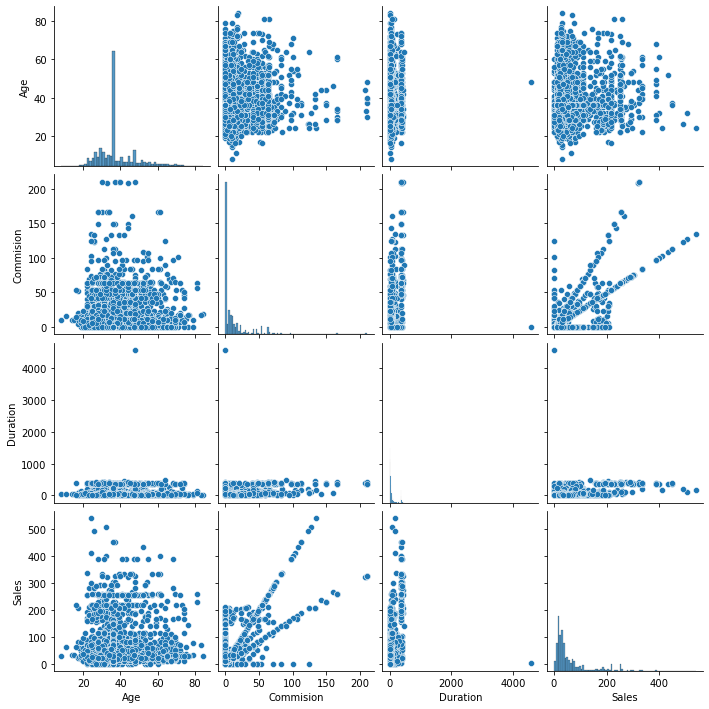

In [56]:
plt.figure(figsize=(6, 3))
sns.pairplot(data=df2)

In [57]:
object_columns

['Agency_Code', 'Type', 'Claimed', 'Channel', 'Product Name', 'Destination']

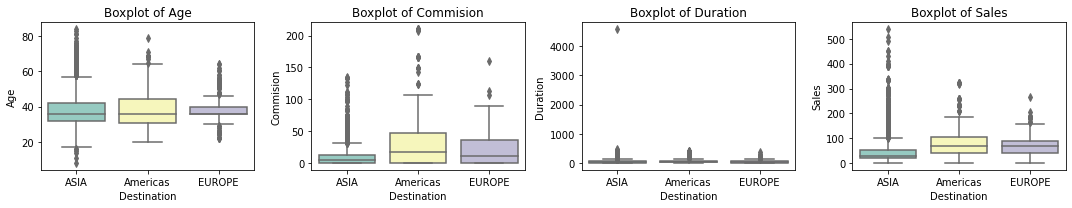

In [58]:
plt.figure(figsize = (15,3))
for i in range(len(numeric_columns)):
    plt.subplot(1, 4, i + 1)
    sns.boxplot(y = df2[numeric_columns[i]], data = df2, palette='Set3', x = 'Destination')
    plt.title('Boxplot of {}'.format(numeric_columns[i]))
    plt.tight_layout()

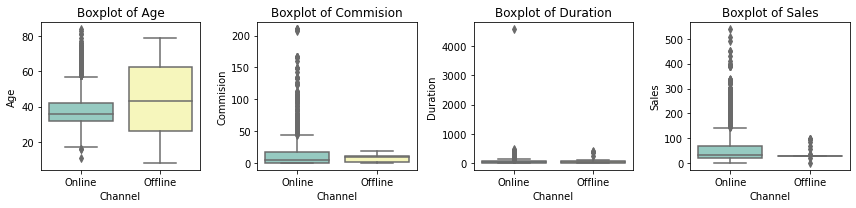

In [59]:
plt.figure(figsize = (12,3))
for i in range(len(numeric_columns)):
    plt.subplot(1, 4, i + 1)
    sns.boxplot(y = df2[numeric_columns[i]], data = df2, palette='Set3', x = 'Channel')
    plt.title('Boxplot of {}'.format(numeric_columns[i]))
    plt.tight_layout()

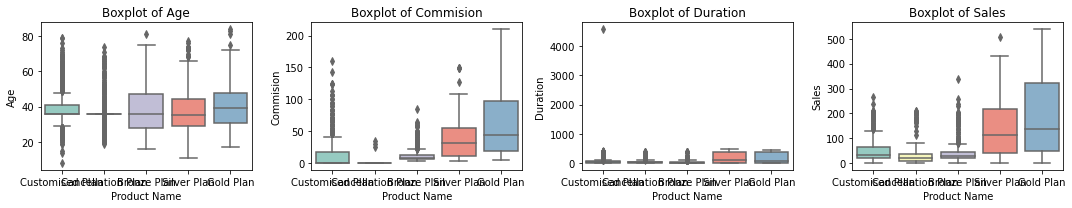

In [60]:
plt.figure(figsize = (15,3))
for i in range(len(numeric_columns)):
    plt.subplot(1, 4, i + 1)
    sns.boxplot(y = df2[numeric_columns[i]], data = df2, palette='Set3', x = 'Product Name')
    plt.title('Boxplot of {}'.format(numeric_columns[i]))
    plt.tight_layout()

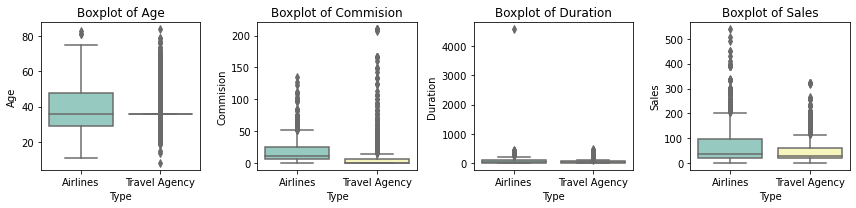

In [61]:
plt.figure(figsize = (12,3))
for i in range(len(numeric_columns)):
    plt.subplot(1, 4, i + 1)
    sns.boxplot(y = df2[numeric_columns[i]], data = df2, palette='Set3', x = 'Type')
    plt.title('Boxplot of {}'.format(numeric_columns[i]))
    plt.tight_layout()

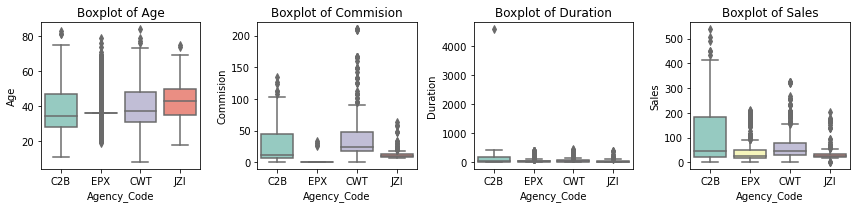

In [62]:
plt.figure(figsize = (12,3))
for i in range(len(numeric_columns)):
    plt.subplot(1, 4, i + 1)
    sns.boxplot(y = df2[numeric_columns[i]], data = df2, palette='Set3', x = 'Agency_Code')
    plt.title('Boxplot of {}'.format(numeric_columns[i]))
    plt.tight_layout()

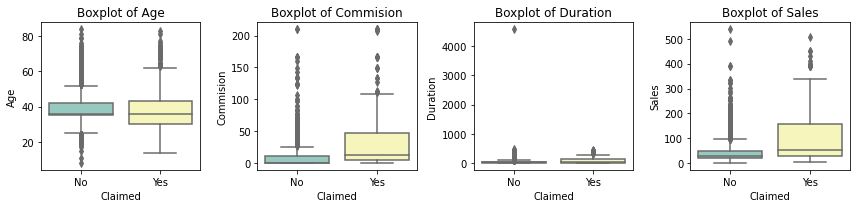

In [63]:
plt.figure(figsize = (12,3))
for i in range(len(numeric_columns)):
    plt.subplot(1, 4, i + 1)
    sns.boxplot(y = df2[numeric_columns[i]], data = df2, palette='Set3', x = 'Claimed')
    plt.title('Boxplot of {}'.format(numeric_columns[i]))
    plt.tight_layout()

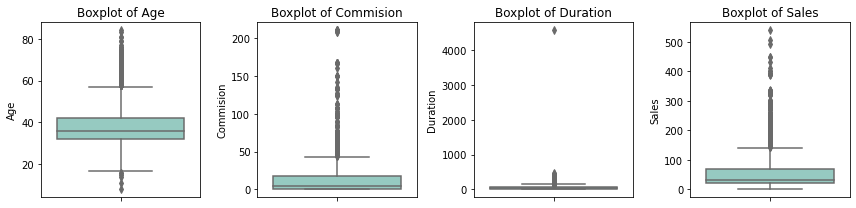

In [64]:
plt.figure(figsize = (12,3))
for i in range(len(numeric_columns)):
    plt.subplot(1, 4, i + 1)
    sns.boxplot(y = df2[numeric_columns[i]], data = df2, palette='Set3')
    plt.title('Boxplot of {}'.format(numeric_columns[i]))
    plt.tight_layout()

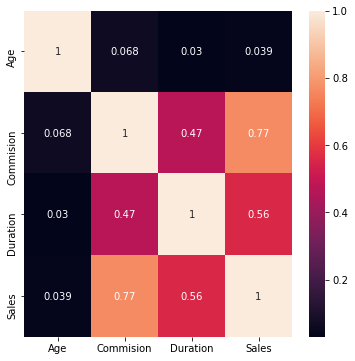

In [65]:
cor = df2.corr()
plt.figure(figsize=(6, 6))
sns.heatmap(cor,annot = True);

In [66]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range 

In [67]:
for col in numeric_columns:
    low, up = remove_outlier(df2[col])
    df2[col]=np.where(df2[col]>up,up,df2[col])
    df2[col]=np.where(df2[col]<low,low,df2[col])

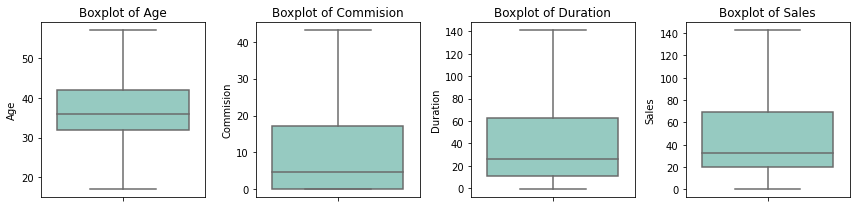

In [68]:
plt.figure(figsize = (12,3))
for i in range(len(numeric_columns)):
    plt.subplot(1, 4, i + 1)
    sns.boxplot(y = df2[numeric_columns[i]], data = df2, palette='Set3')
    plt.title('Boxplot of {}'.format(numeric_columns[i]))
    plt.tight_layout()

#### Q 2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network

In [69]:
df2.shape

(3000, 10)

In [70]:
# Are there any duplicates ?
dups = df2.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df2[dups]

Number of duplicate rows = 286


,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
63,30.0,C2B,Airlines,Yes,15.0000,Online,27.0,60.0,Bronze Plan,ASIA
103,32.0,C2B,Airlines,Yes,43.0875,Online,141.0,142.5,Silver Plan,ASIA
113,39.0,C2B,Airlines,Yes,43.0875,Online,141.0,142.5,Silver Plan,ASIA
168,40.0,C2B,Airlines,Yes,43.0875,Online,141.0,142.5,Silver Plan,ASIA
218,51.0,C2B,Airlines,Yes,43.0875,Online,141.0,142.5,Silver Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2962,36.0,EPX,Travel Agency,No,0.0000,Online,4.0,20.0,Customised Plan,ASIA
2981,34.0,C2B,Airlines,Yes,43.0875,Online,141.0,142.5,Silver Plan,ASIA
2984,36.0,EPX,Travel Agency,No,0.0000,Online,1.0,20.0,Customised Plan,ASIA
2991,29.0,C2B,Airlines,Yes,43.0875,Online,141.0,142.5,Silver Plan,ASIA


In [71]:
df2.drop_duplicates(inplace=True)

In [72]:
df2.shape

(2714, 10)

In [73]:
df2.dtypes

Age             float64
Agency_Code      object
Type             object
Claimed          object
Commision       float64
Channel          object
Duration        float64
Sales           float64
Product Name     object
Destination      object
dtype: object

In [104]:
df2.Type.value_counts(normalize = True)

1    0.623803
0    0.376197
Name: Type, dtype: float64

In [74]:
for feature in df2.columns: 
    if df2[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df2[feature].unique()))
        print(pd.Categorical(df2[feature].unique()).codes)
        df2[feature] = pd.Categorical(df2[feature]).codes



feature: Agency_Code
['C2B', 'EPX', 'CWT', 'JZI']
Categories (4, object): ['C2B', 'CWT', 'EPX', 'JZI']
[0 2 1 3]


feature: Type
['Airlines', 'Travel Agency']
Categories (2, object): ['Airlines', 'Travel Agency']
[0 1]


feature: Claimed
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


feature: Channel
['Online', 'Offline']
Categories (2, object): ['Offline', 'Online']
[1 0]


feature: Product Name
['Customised Plan', 'Cancellation Plan', 'Bronze Plan', 'Silver Plan', 'Gold Plan']
Categories (5, object): ['Bronze Plan', 'Cancellation Plan', 'Customised Plan', 'Gold Plan', 'Silver Plan']
[2 1 0 4 3]


feature: Destination
['ASIA', 'Americas', 'EUROPE']
Categories (3, object): ['ASIA', 'Americas', 'EUROPE']
[0 1 2]


In [75]:
df2.Claimed.value_counts()

0    1921
1     793
Name: Claimed, dtype: int64

In [76]:
df2.Claimed.value_counts(normalize = True)

0    0.707811
1    0.292189
Name: Claimed, dtype: float64

In [77]:
df2.dtypes

Age             float64
Agency_Code        int8
Type               int8
Claimed            int8
Commision       float64
Channel            int8
Duration        float64
Sales           float64
Product Name       int8
Destination        int8
dtype: object

In [78]:
X = df2.drop("Claimed", axis=1)
y = df2.pop("Claimed")

In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

In [80]:
X_train.shape

(1899, 9)

In [81]:
X_test.shape

(815, 9)

In [82]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini'],
    'max_depth': [10, 12, 15,],
    'min_samples_leaf': [50,100,150], 
    'min_samples_split': [150,300,450],
}

dt_model = DecisionTreeClassifier(random_state=1)

grid_search_dt = GridSearchCV(estimator = dt_model, param_grid = param_grid, cv = 3)

In [83]:
grid_search_dt.fit(X_train, train_labels)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'criterion': ['gini'], 'max_depth': [10, 12, 15],
                         'min_samples_leaf': [50, 100, 150],
                         'min_samples_split': [150, 300, 450]})

In [84]:
grid_search_dt.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 50,
 'min_samples_split': 300}

In [85]:
best_grid_dt = grid_search_dt.best_estimator_

In [86]:
ytrain_predict_dt = best_grid_dt.predict(X_train)
ytest_predict_dt = best_grid_dt.predict(X_test)

In [87]:
print (pd.DataFrame(best_grid_dt.feature_importances_, columns = ["Imp"], 
                    index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.654860
Sales         0.232013
Product Name  0.094996
Commision     0.011202
Duration      0.006928
Age           0.000000
Type          0.000000
Channel       0.000000
Destination   0.000000


In [88]:
from sklearn.ensemble import RandomForestClassifier

In [89]:
param_grid = {
    'max_depth': [5,  15],
    'max_features': [4, 5],
    'min_samples_leaf': [30, 50, 75],
    'min_samples_split': [60, 100, 150],
    'n_estimators': [101, 201]
}

rfcl = RandomForestClassifier(random_state=1)

grid_search_rf = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)

In [90]:
grid_search_rf.fit(X_train, train_labels)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [5, 15], 'max_features': [4, 5],
                         'min_samples_leaf': [30, 50, 75],
                         'min_samples_split': [60, 100, 150],
                         'n_estimators': [101, 201]})

In [91]:
grid_search_rf.best_params_

{'max_depth': 15,
 'max_features': 5,
 'min_samples_leaf': 30,
 'min_samples_split': 60,
 'n_estimators': 101}

In [92]:
best_grid_rf = grid_search_rf.best_estimator_

In [93]:
ytrain_predict_rf = best_grid_rf.predict(X_train)
ytest_predict_rf = best_grid_rf.predict(X_test)

In [94]:
print (pd.DataFrame(best_grid_rf.feature_importances_, columns = ["Imp"], 
                    index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.404396
Sales         0.183341
Product Name  0.112619
Commision     0.090377
Duration      0.076120
Type          0.075081
Age           0.043274
Destination   0.014793
Channel       0.000000


In [95]:
df2.describe()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
count,2714.000000,2714.000000,2714.000000,2714.000000,2714.000000,2714.000000,2714.000000,2714.000000,2714.000000
mean,37.557848,1.338615,0.623803,10.110249,0.983051,41.779293,46.687524,1.559322,0.273766
std,9.211914,0.988286,0.484520,13.798433,0.129105,41.374383,38.316646,1.205857,0.597202
min,17.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000
25%,31.250000,0.000000,0.000000,0.000000,1.000000,11.000000,20.000000,1.000000,0.000000
50%,36.000000,2.000000,1.000000,4.630000,1.000000,26.000000,32.000000,2.000000,0.000000
75%,42.750000,2.000000,1.000000,15.000000,1.000000,57.000000,62.000000,2.000000,0.000000
max,57.000000,3.000000,1.000000,43.087500,1.000000,141.000000,142.500000,4.000000,2.000000


In [96]:
from sklearn.neural_network import MLPClassifier

In [97]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
X_trains = sc.fit_transform(X_train) 
X_tests = sc.transform (X_test)

In [98]:
param_grid = {
    'hidden_layer_sizes': [100,200,300],
    'activation': ['logistic', 'relu'],
    'solver': ['sgd', 'adam'],
    'tol': [0.1,0.01],
    'max_iter' : [10000]
}

ann = MLPClassifier()

grid_search_an = GridSearchCV(estimator = ann, param_grid = param_grid, cv = 3)

In [99]:
grid_search_an.fit(X_trains, train_labels)

GridSearchCV(cv=3, estimator=MLPClassifier(),
             param_grid={'activation': ['logistic', 'relu'],
                         'hidden_layer_sizes': [100, 200, 300],
                         'max_iter': [10000], 'solver': ['sgd', 'adam'],
                         'tol': [0.1, 0.01]})

In [100]:
grid_search_an.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': 200,
 'max_iter': 10000,
 'solver': 'adam',
 'tol': 0.01}

In [101]:
best_grid_an = grid_search_an.best_estimator_

In [102]:
ytrain_predict_an = best_grid.predict(X_trains)
ytest_predict_an = best_grid.predict(X_tests)

NameError: name 'best_grid' is not defined

#### Q 2.3 Performance Metrics: Comment and Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score, classification reports for each model. 

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
confusion_matrix(train_labels, ytrain_predict_dt)

In [ ]:
confusion_matrix(test_labels, ytest_predict_dt)

In [ ]:
confusion_matrix(train_labels, ytrain_predict_rf)

In [ ]:
confusion_matrix(test_labels, ytest_predict_rf)

In [ ]:
confusion_matrix(train_labels, ytrain_predict_an)

In [ ]:
confusion_matrix(test_labels, ytest_predict_an)

In [ ]:
print(classification_report(train_labels, ytrain_predict_dt))

In [ ]:
print(classification_report(test_labels, ytest_predict_dt))

In [ ]:
print(classification_report(train_labels, ytrain_predict_rf))

In [ ]:
print(classification_report(test_labels, ytest_predict_rf))

In [ ]:
print(classification_report(train_labels, ytrain_predict_an))

In [ ]:
print(classification_report(test_labels, ytest_predict_an))

In [ ]:
best_grid_dt.score(X_train,train_labels)

In [ ]:
best_grid_dt.score(X_test,test_labels)

In [ ]:
best_grid_rf.score(X_train,train_labels)

In [ ]:
best_grid_rf.score(X_test,test_labels)

In [ ]:
best_grid_an.score(X_train,train_labels)

In [ ]:
best_grid_an.score(X_test,test_labels)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [ ]:
probs = best_grid_dt.predict_proba(X_train)
probs = probs[:, 1]
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [ ]:
probs = best_grid_rf.predict_proba(X_train)
probs = probs[:, 1]
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [ ]:
probs = best_grid_an.predict_proba(X_train)
probs = probs[:, 1]
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [ ]:
probs = best_grid_an.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [ ]:
probs = best_grid_rf.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [ ]:
probs = best_grid_dt.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()